In [93]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

np.random.seed(1)

In [94]:
def equalProb():
    if np.random.random() < 0.95: return 0
    else: return 1

def boundedNormal(bound, stddev):
    rNum = np.random.normal(stddev)
    while rNum < -bound or rNum > bound:
        rNum = np.random.normal(0, stddev)
    return rNum

In [95]:
def gen_data_one():
    """This Function Generates Data Set 1"""
    center1 = 10
    center2 = 20
    center3 = 30
    bound = 4
    stddev = 2

    tuples = []
    numTuples = 1000

    for i in range(numTuples):
        rNum = np.random.randint(3)
        if rNum == 0:
            # candidate = 0
            rNum = boundedNormal(bound, stddev)
            a1 = center1 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center1 + rNum

        elif rNum ==1:
            # candidate = 1
            rNum = boundedNormal(bound+10, stddev+10)
            a1 = center2 + rNum
            rNum = boundedNormal(bound+5, stddev+5)
            a2 = center2 + rNum + 5

        else:
            # candidate = 2
            rNum =boundedNormal(bound+4, stddev)
            a1 = center3 + rNum
            rNum = boundedNormal(bound+2, stddev)
            a2 = center3 + rNum

        atuple = (a1, a2)
        tuples.append(atuple)

    df = pd.DataFrame(tuples, columns=["a1", "a2"])
    return df

In [96]:

def gen_data_two():
    """This Function Generates Data Set 1"""
    center1 = 15
    center2 = 15
    center3 = 15
    bound = 25
    stddev = 2

    tuples = []
    numTuples = 1000

    for i in range(numTuples):
        rNum = np.random.randint(3)
        if rNum == 0:
            # candidate = 0
            rNum = boundedNormal(bound, stddev)
            a1 = center1 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center1 + rNum

        elif rNum ==1:
            # candidate = 1
            rNum = boundedNormal(bound, stddev)
            a1 = center2 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center2 + rNum

        else:
            # candidate = 2
            rNum =boundedNormal(bound, stddev)
            a1 = center3 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center3 + rNum

        atuple = (a1, a2)
        tuples.append(atuple)

    df = pd.DataFrame(tuples, columns=["a1", "a2"])
    return df

In [97]:
def plot_clustering(theData, kmeansLabels,brcLabels,aggLabels, dbLabels,graph_title):
    fig, ax = plt.subplots(2,2)

    # Plotting Kmeans
    for i in range(len(theData)):
        if kmeansLabels[i] == 0: theColor= "red"
        if kmeansLabels[i] == 1: theColor= "green"
        if kmeansLabels[i] == 2: theColor= "blue"
        ax[0,0].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
        ax[0,0].set_title("kmeans")

    # Plotting Birch
    for i in range(len(theData)):
        if brcLabels[i] == 0: theColor = "red"
        if brcLabels[i] == 1: theColor = "green"
        if brcLabels[i] == 2: theColor = "blue"
        ax[0,1].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
        ax[0,1].set_title("birch")

    # Plotting Agglomerative
    for i in range(len(theData)):
        if aggLabels[i] == 0: theColor = "red"
        if aggLabels[i] == 1: theColor = "green"
        if aggLabels[i] == 2: theColor = "blue"
        ax[1, 0].scatter(theData[i][0], theData[i][1], s=9.5, color=theColor)
        ax[1, 0].set_title("Agglomerative")

    # Plotting DBScan
    for i in range(len(theData)):
        if dbLabels[i] ==0: theColor = "red"
        elif dbLabels[i] == 1: theColor = "green"
        elif dbLabels[i] == 2: theColor = "blue"
        ax[1, 1].scatter(theData[i][0], theData[i][1], s= 9.5, alpha=1.0, color=theColor)
        ax[1, 1].set_title("DBScan")

    fig.tight_layout()
    fig.suptitle(graph_title)
    fig.subplots_adjust(top=0.88)
    plt.figure(figsize=(7, 5))
    plt.show()

In [98]:
def create_graph(df, title):
    """This Function Goes through and creates the clustring graphs out of the data shown"""
    numClusters= 3
    df = gen_data_two()
    theData = df.to_numpy()

    # kMeans
    kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(df)

    # Birch
    brc = Birch(n_clusters=numClusters).fit(df)

    # Agglomerative
    agg = AgglomerativeClustering(n_clusters=numClusters, linkage="ward").fit(df)

    # DBSCAN
    db = DBSCAN(eps=1.5, min_samples=4).fit(df)

    plot_clustering(theData, kmeans.labels_, brc.labels_,agg.labels_, db.labels_, title)

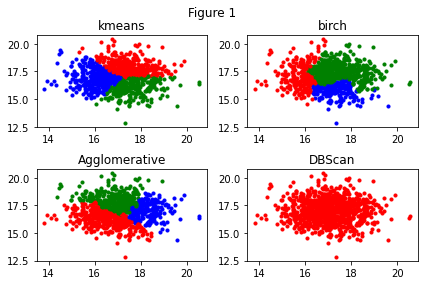

<Figure size 504x360 with 0 Axes>

In [99]:
create_graph(gen_data_one(), "Figure 1")

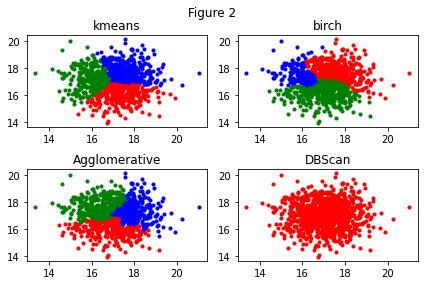

<Figure size 504x360 with 0 Axes>

In [100]:
create_graph(gen_data_two(), "Figure 2")